In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("spotify_top_charts_22.csv")
df.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               646 non-null    object 
 1   artist_names      646 non-null    object 
 2   track_name        646 non-null    object 
 3   peak_rank         646 non-null    int64  
 4   weeks_on_chart    646 non-null    int64  
 5   danceability      646 non-null    float64
 6   energy            646 non-null    float64
 7   key               646 non-null    int64  
 8   loudness          646 non-null    float64
 9   mode              646 non-null    int64  
 10  speechiness       646 non-null    float64
 11  acousticness      646 non-null    float64
 12  instrumentalness  646 non-null    float64
 13  liveness          646 non-null    float64
 14  tempo             646 non-null    float64
 15  time_signature    646 non-null    int64  
 16  duration_ms       646 non-null    int64  
dt

In [4]:
print(f'Shape of dataset -> {df.shape}')

Shape of dataset -> (646, 17)


In [5]:
# Black - Aqua Blue - Pink
colors = ["#09101F","#72DDF7", '#F7AEF8']

In [6]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3, color='black')

In [7]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    
    sns.histplot(data=df, x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=3
                )
    ax.lines[0].set_color(second_color)
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

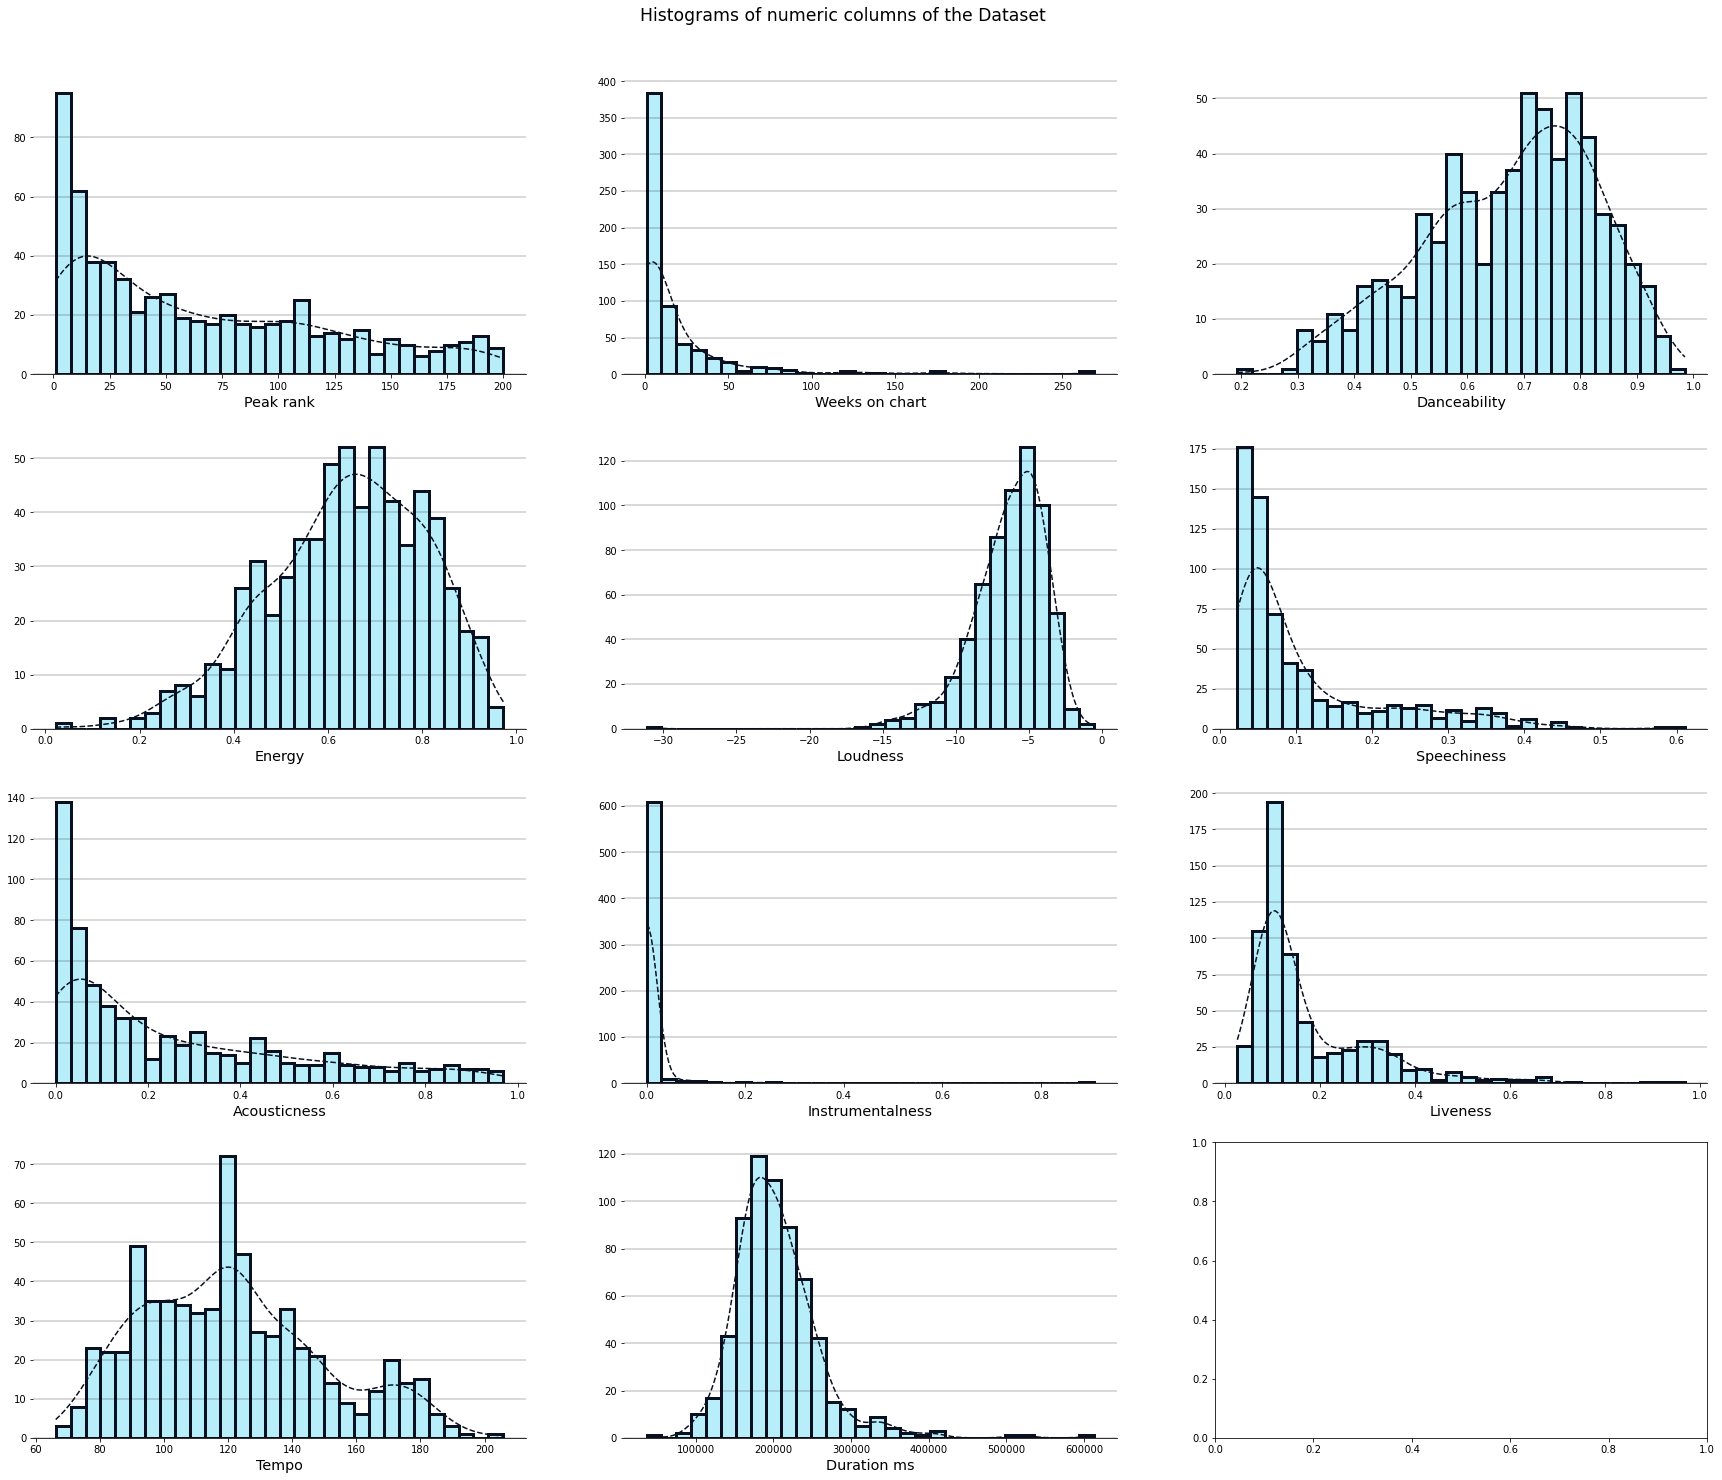

In [8]:
cols = ['peak_rank', 'weeks_on_chart', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',  'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

In [9]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    
    ax.bar(df[x].value_counts().index, df[x].value_counts().values,
           color=main_color, edgecolor=second_color, linewidth=3)
    
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

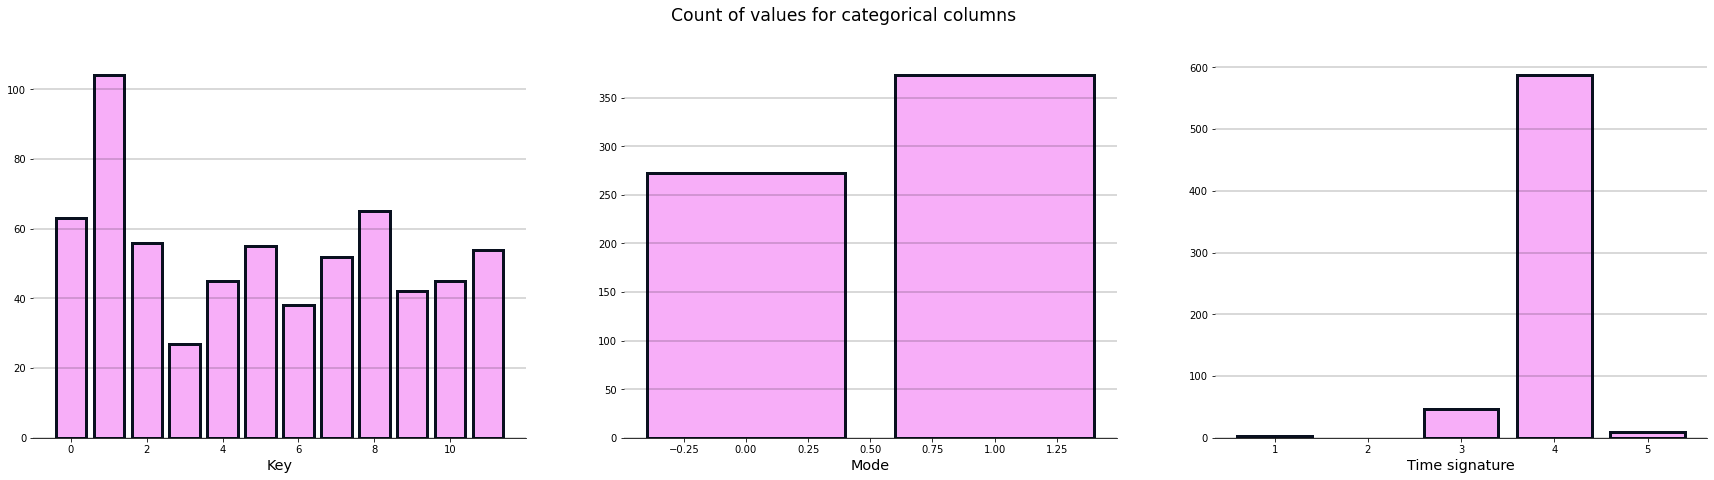

In [10]:
cols = ['key', 'mode', 'time_signature']


fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

In [11]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

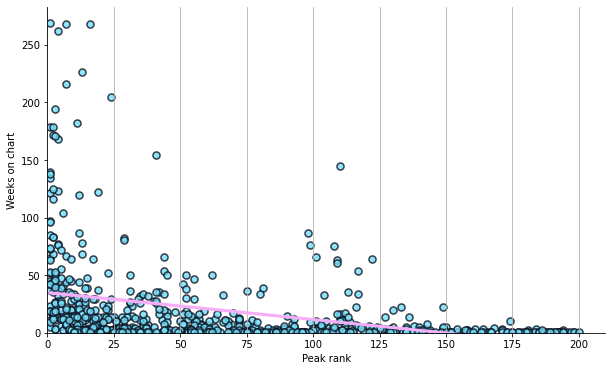

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'peak_rank', 'weeks_on_chart', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

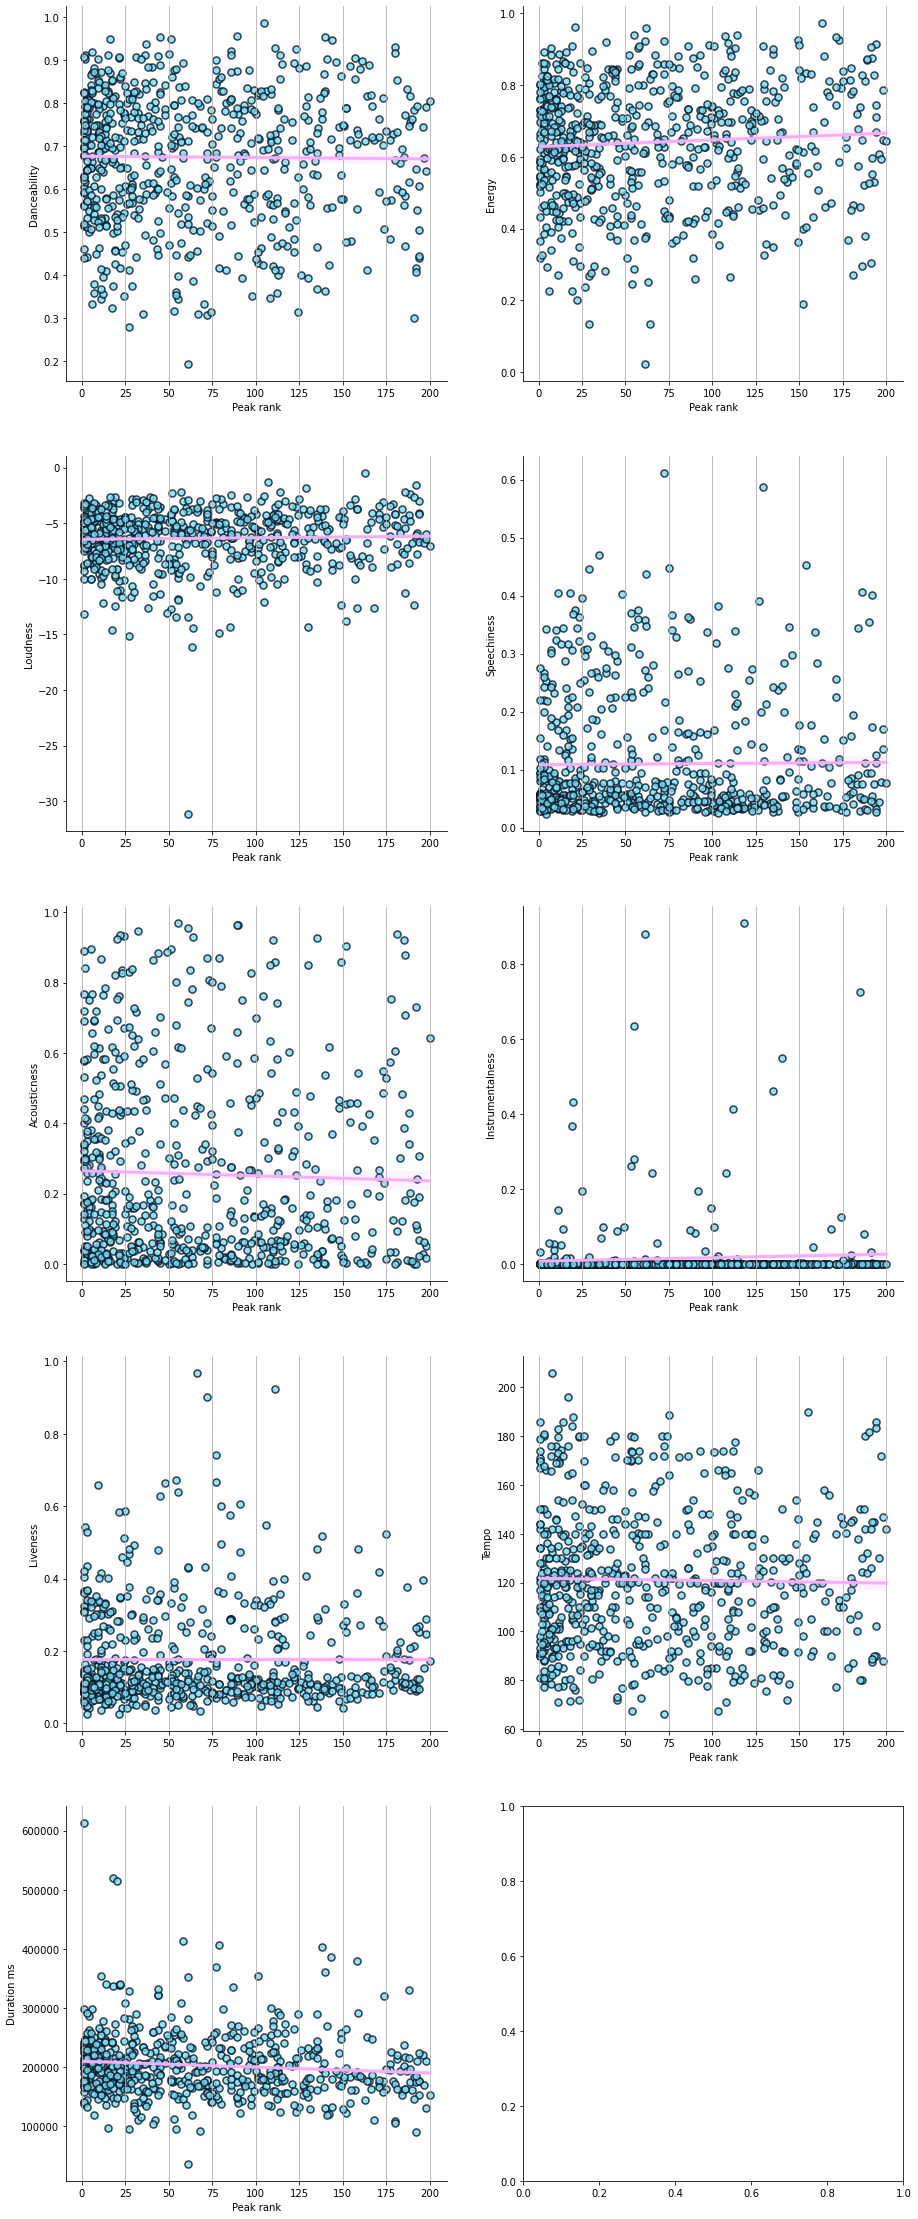

In [13]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'peak_rank', col, ax)
    

plt.show()

In [14]:
def stripplot(df, x, y, ax, palette=[colors[1], colors[2]]):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
                 linewidth=2, size=8)
    
    set_style(ax)

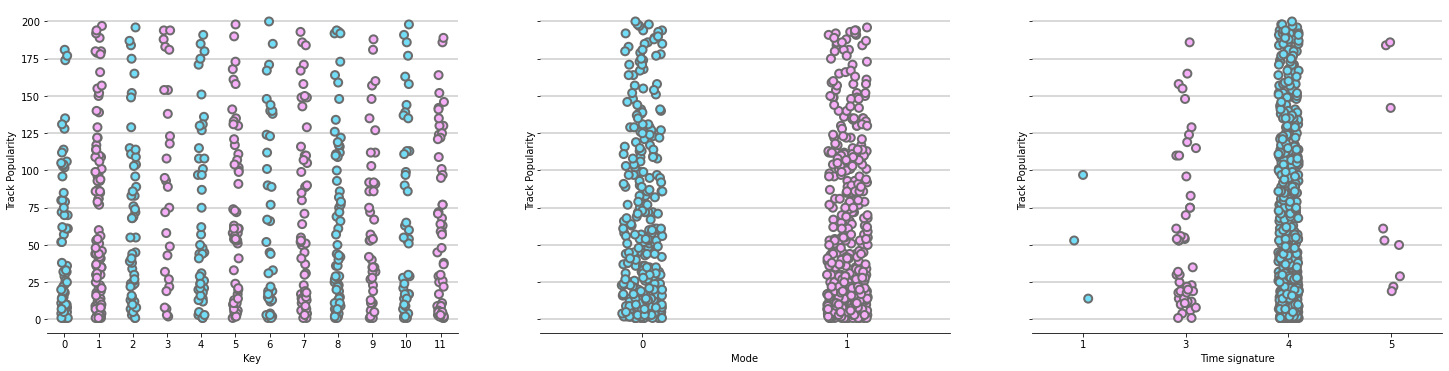

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

for i, col in enumerate(['key', 'mode', 'time_signature']):
    
    stripplot(df, col, 'peak_rank', axs[i])
    
    axs[i].set(
        xlabel=col.replace("_", " ").capitalize(),
        ylabel="Track Popularity"
    )

plt.show()

In [16]:
def corr_map(df, ax, palette, edgecolor=colors[0]):
    
    corr = df.corr()
    
    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")
    

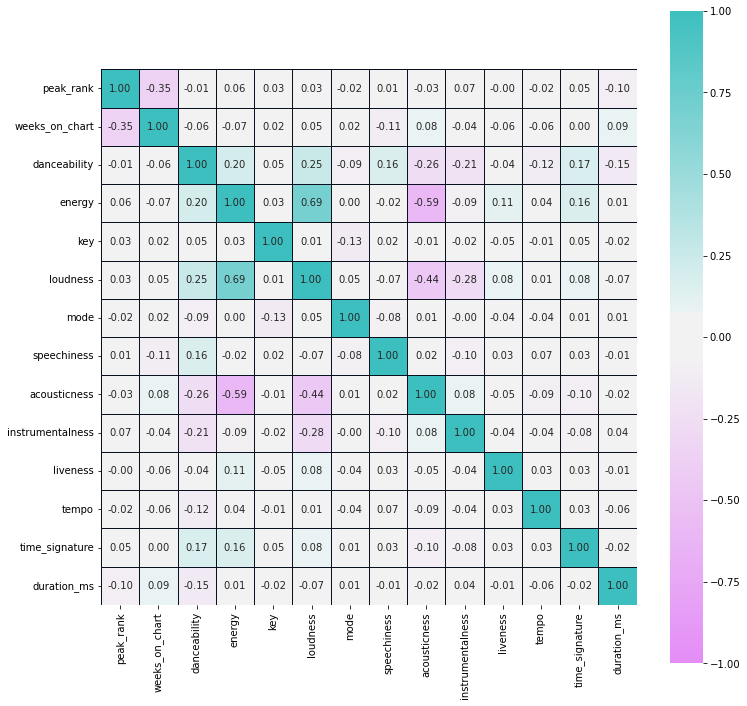

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df, ax, palette)

In [18]:
# 1 - Top 3 artists for popularity

artists_pop_sorted = df.loc[:, ['artist_names', 'peak_rank']].drop_duplicates('artist_names').sort_values('peak_rank', ascending=False)

artists_pop_sorted[:3]

,artist_names,peak_rank
609,"Miksu / Macloud, t-low",200
310,Kanye West,198
583,"Fivio Foreign, The Kid LAROI",198


In [19]:
# 2 - Top 3 artists with more hits on tiktok in 2022

artists_top_hits = df['artist_names'].value_counts(ascending=False)

artists_top_hits[:3]

The Weeknd      20
Bad Bunny       19
Harry Styles    18
Name: artist_names, dtype: int64

In [20]:
# 3 - Top 5 track for popularity

tracks_pop_sorted = df.loc[:, ['track_name', 'weeks_on_chart']].sort_values('weeks_on_chart', ascending=False)

tracks_pop_sorted[:5]

,track_name,weeks_on_chart
139,Shape of You,269
198,Say You Won't Let Go,268
91,Believer,268
150,Perfect,262
397,goosebumps,226


In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(['peak_rank', 'track_name', 'artist_names', 'instrumentalness','uri'], axis=1).values
y = df['peak_rank'].values

In [22]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

/Users/mehribanosmanli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

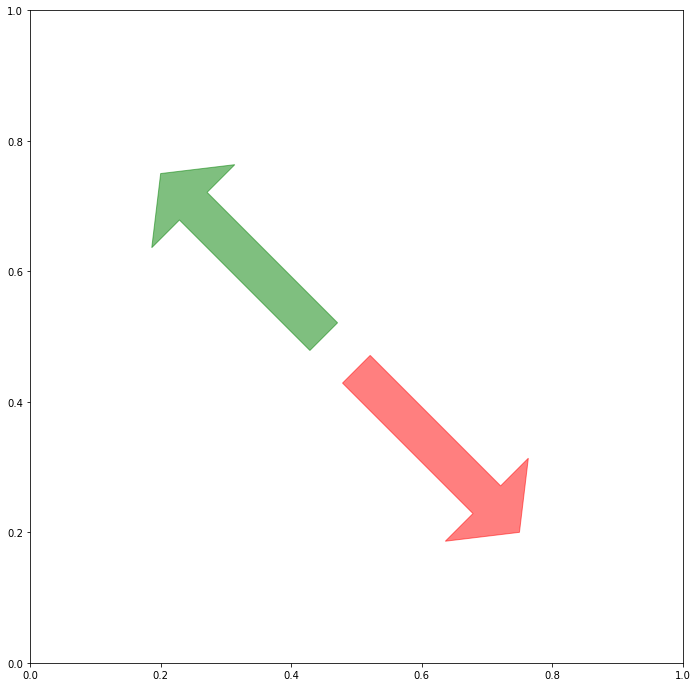

In [24]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

#predict_space=np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
print('With Linear Regression accuracy is: ', reg.score(x_test,y_test))

With Linear Regression accuracy is:  0.06606783023465201


In [26]:
from sklearn.linear_model import Lasso
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print(lasso.score(x_test,y_test))

0.12194973874883341


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.010309278350515464


In [28]:
from sklearn.model_selection import GridSearchCV
grid={'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=3)
knn_cv.fit(x,y)
print('Tuned hyperparameter k: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

/Users/mehribanosmanli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Tuned hyperparameter k: {'n_neighbors': 8}
Best score: 0.029421475739305192
